In [1]:
import numpy as np
from scripts.mesh import *
from scripts.simulation import *
from scripts.graph import *
from scripts.maintain import *

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

font = {'family' : 'normal',
        'size'   : 24}

matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# def generate_degree_ratio(degree, low, high = 1):
#     if degree < 3:
#         low = 1
#     return np.random.uniform(low,high)
        
# def generate_mesh_settings(grid_size,N1=False):
#     mesh_degree_settings = MESH_DEGREE_SETTINGS
#     mesh_settings = MESH_SETTINGS
    
#     mesh_settings['grid_size'] = grid_size
#     mesh_settings['contraction_ratio'] = np.random.uniform(0,0.25)
#     mesh_settings['N-1'] = N1
    
#     mesh_degree_settings[6] = generate_degree_ratio(6,0)
#     mesh_degree_settings[5] = generate_degree_ratio(5,0)
#     mesh_degree_settings[4] = generate_degree_ratio(4,0)
#     mesh_degree_settings[3] = generate_degree_ratio(3,0.2)
# #     mesh_degree_settings[2] = generate_degree_ratio(2,0.2)
    
#     return mesh_settings

# def generate_sparse_mesh_settings(grid_size,N1=False):
#     mesh_degree_settings = MESH_DEGREE_SETTINGS
#     mesh_settings = MESH_SETTINGS
    
#     mesh_settings['grid_size'] = grid_size
#     mesh_settings['contraction_ratio'] = np.random.uniform(0,0.25)
#     mesh_settings['N-1'] = N1
    
#     mesh_degree_settings[6] = generate_degree_ratio(6,0,0.3)
#     mesh_degree_settings[5] = generate_degree_ratio(5,0,0.3)
#     mesh_degree_settings[4] = generate_degree_ratio(4,0,0.35)
#     mesh_degree_settings[3] = generate_degree_ratio(3,0,0.4)
# #     mesh_degree_settings[2] = generate_degree_ratio(2,0.2)
    
#     return mesh_settings

# def generate_med_mesh_settings(grid_size,N1=False):
#     mesh_degree_settings = MESH_DEGREE_SETTINGS
#     mesh_settings = MESH_SETTINGS
    
#     mesh_settings['grid_size'] = grid_size
#     mesh_settings['contraction_ratio'] = np.random.uniform(0,0.25)
#     mesh_settings['N-1'] = N1
    
#     mesh_degree_settings[6] = generate_degree_ratio(6,0.3,0.8)
#     mesh_degree_settings[5] = generate_degree_ratio(5,0.4,0.8)
#     mesh_degree_settings[4] = generate_degree_ratio(4,0.4,0.8)
#     mesh_degree_settings[3] = generate_degree_ratio(3,0.4,0.8)
# #     mesh_degree_settings[2] = generate_degree_ratio(2,0.2)
    
#     return mesh_settings

# def generate_high_mesh_settings(grid_size,N1=False):
#     mesh_degree_settings = MESH_DEGREE_SETTINGS
#     mesh_settings = MESH_SETTINGS
    
#     mesh_settings['grid_size'] = grid_size
#     mesh_settings['contraction_ratio'] = np.random.uniform(0,0.25)
#     mesh_settings['N-1'] = N1
    
#     mesh_degree_settings[6] = generate_degree_ratio(6,0.8,1)
#     mesh_degree_settings[5] = generate_degree_ratio(5,0.8,1)
#     mesh_degree_settings[4] = generate_degree_ratio(4,0.7,1)
#     mesh_degree_settings[3] = generate_degree_ratio(3,0.7,1)
# #     mesh_degree_settings[2] = generate_degree_ratio(2,0.2)
    
#     return mesh_settings




In [3]:
# def get_bfs_levels(mesh):
#     fail_rate = 1
#     valve_register = mesh.valve_register
    
#     valve_register.recover_valves()
#     vids2fail = generate_vids2fail(mesh.valid_vids,fail_rate)
#     valves_dict = fail_valves(valve_register.vid2v,vids2fail)
#     A = assemble_adjacency_mtx(mesh.grid_size,valves_dict)
#     valve_register.recover_valves()
    
#     return bfs_levels(0,A)

# def get_nids2maintain(bfs_levels, level):
#     nids = []
#     for i in range(level):
#         idx = 2*(i+1)
#         nids+=bfs_levels[idx]
#     return nids

# def get_vids2maintain(nids2maintain,nid2v):
#     vids = []
#     for nid in nids2maintain:
#         valves = nid2v[nid]
#         for v in valves:
#             if not (v.keep_open or v.keep_closed):
#                 vids.append(v.vid)
#     return vids  

In [4]:
# def maintain_valves(mesh,maintain_level):
#     levels = get_bfs_levels(mesh)
#     nids = get_nids2maintain(levels,maintain_level)
#     valve_reg = mesh.valve_register
#     vids = get_vids2maintain(nids,valve_reg.nid2v)
#     return vids


In [5]:
# def create_segsum(mesh,valves_dict):
#     segments = simulate_segments(mesh.grid_size,valves_dict)
#     mtx_diff = create_mtx_diff(mesh.grid_size,valves_dict,mesh.valid_vids)
#     num_closed_pipes = len(mesh.get_closed_pids())
#     num_nodes = mesh.grid_size*mesh.grid_size
#     seg_sum = SegmentSummary(num_nodes,segments,mtx_diff,num_closed_pipes)
#     return seg_sum
    

In [6]:
# def generate_seg_sum_maintain(mesh,vfail_rate,degree):
#     valve_register = mesh.valve_register
#     valve_register.recover_valves()
    
#     vids2maintain = maintain_valves(mesh,degree)
#     normal_vids = list(set(mesh.valid_vids)-set(vids2maintain))
    
#     maintain2fail  = generate_vids2fail(vids2maintain,vfail_rate/5)
#     others2fail = generate_vids2fail(normal_vids,vfail_rate)
#     vids2fail = maintain2fail+others2fail
    
#     valves_dict = fail_valves(valve_register.vid2v,vids2fail)
    
#     seg_sum = create_segsum(mesh,valves_dict)
#     return seg_sum

In [7]:
# def repair_impact(mesh,fail_rate,valid_pids,maintain_degree,repair_degree):
#     seg_sum = generate_seg_sum_maintain(mesh,fail_rate,maintain_degree)
#     return seg_sum.multi_pipe_iso_consequences(valid_pids,repair_degree)

# def mc_repair_impact(mesh,fail_rate,valid_pids,maintain_degree,repair_degree,num_sim = 100):
#     pool = mp.Pool(mp.cpu_count()-1)
#     results = pool.starmap(repair_impact, [(mesh,fail_rate,valid_pids,maintain_degree,repair_degree) for _ in range(num_sim)])
#     pool.close()
    
#     directs,unintends = [],[]
#     for direct,unintend in results:
#         directs.append(direct)
#         unintends.append(unintend)
        
#     return np.mean(directs)/len(valid_pids),np.mean(unintends)/len(valid_pids)

In [8]:
# def calculate_consequence(mesh,maintain_degrees, repair_degree,fail_rate):
#     directs, unintends = [],[]
#     maintain_ratio = []
#     for maintain_degree in maintain_degrees:
#         vids2maintain = maintain_valves(mesh,maintain_degree)
#         num_valves = len(vids2maintain)
#         ratio = num_valves/len(mesh.valid_vids)
#         maintain_ratio.append(ratio)
    
#         direct,unintend = mc_repair_impact(mesh,fail_rate,mesh.valid_pids,
#                                        maintain_degree,repair_degree,num_sim = 60)
#         directs.append(direct)
#         unintends.append(unintend)
#     return directs,unintends,maintain_ratio

# def analyze_consequence(consequence):
#     directs,unintends,maintain_ratio = consequence
#     direct_base,unintend_base = directs[0],unintends[0]
#     reductions_direct,reductions_unintend = [], []
#     for direct, unintend in zip(directs,unintends):
#         tot = direct+unintend
#         rd_direct = direct_base-direct
#         rd_unintend = (unintend_base- unintend)/tot        
#         reductions_direct.append(rd_direct)
#         reductions_unintend.append(rd_unintend)
#     return np.array(maintain_ratio),np.array(reductions_unintend)
        
    

In [9]:
def simulate_sparse_net(grid_size, maintain_degrees, repair_degree,fail_rate, mc_num = 100, n1= True):
    tot_reduction = np.zeros(len(maintain_degrees))
    tot_maintain_ratio = np.zeros(len(maintain_degrees))
    num_sim = 0
    while num_sim < mc_num:
        try:
            mesh_setting = generate_sparse_mesh_settings(grid_size, n1)
            mesh = create_mesh(mesh_setting)
            sparseness = calculate_sparseness(mesh)
            print (f'sparseness of the created mesh (compare to the grid network) {sparseness}')
        except:
            continue
        consequence = calculate_consequence(mesh,maintain_degrees,repair_degree,fail_rate)
        maintain_ratio, reduction = analyze_consequence(consequence)
        tot_maintain_ratio+= maintain_ratio
        tot_reduction += reduction
        num_sim+=1
        
    return tot_maintain_ratio/num_sim,tot_reduction/num_sim

def simulate_moderate_net(grid_size, maintain_degrees, repair_degree,fail_rate, mc_num = 100, n1= True):
    tot_reduction = np.zeros(len(maintain_degrees))
    tot_maintain_ratio = np.zeros(len(maintain_degrees))
    num_sim = 0
    while num_sim < mc_num:
        try:
            mesh_setting = generate_med_mesh_settings(grid_size, n1)
            mesh = create_mesh(mesh_setting)
            sparseness = calculate_sparseness(mesh)
            print (f'sparseness of the created mesh (compare to the grid network) {sparseness}')
        except:
            continue
        consequence = calculate_consequence(mesh,maintain_degrees,repair_degree,fail_rate)
        maintain_ratio, reduction = analyze_consequence(consequence)
        tot_maintain_ratio+= maintain_ratio
        tot_reduction += reduction
        num_sim+=1
        
    return tot_maintain_ratio/num_sim,tot_reduction/num_sim
        

def simulate_dense_net(grid_size, maintain_degrees, repair_degree,fail_rate, mc_num = 100, n1= True):
    tot_reduction = np.zeros(len(maintain_degrees))
    tot_maintain_ratio = np.zeros(len(maintain_degrees))
    num_sim = 0
    while num_sim < mc_num:
        try:
            mesh_setting = generate_high_mesh_settings(grid_size, n1)
            mesh = create_mesh(mesh_setting)
            sparseness = calculate_sparseness(mesh)
            print (f'sparseness of the created mesh (compare to the grid network) {sparseness}')
        except:
            continue
        consequence = calculate_consequence(mesh,maintain_degrees,repair_degree,fail_rate)
        maintain_ratio, reduction = analyze_consequence(consequence)
        tot_maintain_ratio+= maintain_ratio
        tot_reduction += reduction
        num_sim+=1
        
    return tot_maintain_ratio/num_sim,tot_reduction/num_sim



    

In [10]:
SIMULATION_DICT = {'sparse': simulate_sparse_net,
                  'moderate': simulate_moderate_net,
                  'dense': simulate_dense_net}

def simulate_maintain(grid_size,maintain_degrees,
                      repair_degrees,fail_rates,sparseness,mc_num):
    degree_ratios,degree_reductions = [], []
    for repair_degree in repair_degrees:
        print (f'repair degree {repair_degree}')
        ratios,reductions = [], []
        for fail_rate in fail_rates:
            print (f'fail rate {fail_rate}')
            
            ratio,reduction = SIMULATION_DICT[sparseness](grid_size, maintain_degrees, 
                                                          repair_degree,fail_rate,
                                                          mc_num = mc_num, n1= True)
            ratios.append(ratio)
            reductions.append(reduction)
            
        degree_ratios.append(ratios)
        degree_reductions.append(reductions)
    return degree_ratios,degree_reductions



In [54]:
list(range(0,18,3))

[0, 3, 6, 9, 12, 15]

In [11]:
%%time
grid_size = 15
maintain_degrees = list(range(0,18,3))
repair_degrees = list(range(1,6,2))
fail_rates = np.linspace(0.1,0.8,4)
mc_num = 20

degree_ratios_sparse,degree_reductions_sparse = simulate_maintain(grid_size,maintain_degrees,
                                          repair_degrees,fail_rates,"sparse",mc_num)


repair degree 1
fail rate 0.1
sparseness of the created mesh (compare to the grid network) 0.1989795918367347
sparseness of the created mesh (compare to the grid network) 0.1326530612244898
sparseness of the created mesh (compare to the grid network) 0.2755102040816326
sparseness of the created mesh (compare to the grid network) 0.20918367346938777
sparseness of the created mesh (compare to the grid network) 0.08163265306122448
sparseness of the created mesh (compare to the grid network) 0.14285714285714285
sparseness of the created mesh (compare to the grid network) 0.18877551020408162
sparseness of the created mesh (compare to the grid network) 0.1836734693877551
sparseness of the created mesh (compare to the grid network) 0.28061224489795916
sparseness of the created mesh (compare to the grid network) 0.15306122448979592
sparseness of the created mesh (compare to the grid network) 0.14285714285714285
sparseness of the created mesh (compare to the grid network) 0.2653061224489796
spa

sparseness of the created mesh (compare to the grid network) 0.1377551020408163
sparseness of the created mesh (compare to the grid network) 0.11224489795918367
sparseness of the created mesh (compare to the grid network) 0.09693877551020408
sparseness of the created mesh (compare to the grid network) 0.27040816326530615
sparseness of the created mesh (compare to the grid network) 0.14285714285714285
sparseness of the created mesh (compare to the grid network) 0.14285714285714285
sparseness of the created mesh (compare to the grid network) 0.29591836734693877
sparseness of the created mesh (compare to the grid network) 0.09693877551020408
sparseness of the created mesh (compare to the grid network) 0.23469387755102042
sparseness of the created mesh (compare to the grid network) 0.08673469387755102
sparseness of the created mesh (compare to the grid network) 0.07142857142857142
sparseness of the created mesh (compare to the grid network) 0.04591836734693878
sparseness of the created mes

sparseness of the created mesh (compare to the grid network) 0.10204081632653061
sparseness of the created mesh (compare to the grid network) 0.23469387755102042
sparseness of the created mesh (compare to the grid network) 0.17857142857142858
sparseness of the created mesh (compare to the grid network) 0.1683673469387755
sparseness of the created mesh (compare to the grid network) 0.07653061224489796
sparseness of the created mesh (compare to the grid network) 0.12244897959183673
sparseness of the created mesh (compare to the grid network) 0.15306122448979592
sparseness of the created mesh (compare to the grid network) 0.10714285714285714
sparseness of the created mesh (compare to the grid network) 0.19387755102040816
sparseness of the created mesh (compare to the grid network) 0.22448979591836735
sparseness of the created mesh (compare to the grid network) 0.15816326530612246
sparseness of the created mesh (compare to the grid network) 0.0663265306122449
sparseness of the created mesh

In [56]:
%%time

degree_ratios_med,degree_reductions_med = simulate_maintain(grid_size,maintain_degrees,
                                          repair_degrees,fail_rates,"moderate",mc_num)




repair degree 1
fail rate 0.1
sparseness of the created mesh (compare to the grid network) 0.5561224489795918
sparseness of the created mesh (compare to the grid network) 0.5357142857142857
sparseness of the created mesh (compare to the grid network) 0.5867346938775511
sparseness of the created mesh (compare to the grid network) 0.49489795918367346
sparseness of the created mesh (compare to the grid network) 0.5153061224489796
sparseness of the created mesh (compare to the grid network) 0.7193877551020408
sparseness of the created mesh (compare to the grid network) 0.5918367346938775
sparseness of the created mesh (compare to the grid network) 0.6020408163265306
sparseness of the created mesh (compare to the grid network) 0.6377551020408163
sparseness of the created mesh (compare to the grid network) 0.336734693877551
sparseness of the created mesh (compare to the grid network) 0.37244897959183676
sparseness of the created mesh (compare to the grid network) 0.3826530612244898
sparsenes

sparseness of the created mesh (compare to the grid network) 0.6938775510204082
sparseness of the created mesh (compare to the grid network) 0.4897959183673469
sparseness of the created mesh (compare to the grid network) 0.5204081632653061
sparseness of the created mesh (compare to the grid network) 0.7244897959183674
sparseness of the created mesh (compare to the grid network) 0.42346938775510207
sparseness of the created mesh (compare to the grid network) 0.5102040816326531
sparseness of the created mesh (compare to the grid network) 0.6785714285714286
sparseness of the created mesh (compare to the grid network) 0.41836734693877553
sparseness of the created mesh (compare to the grid network) 0.5459183673469388
sparseness of the created mesh (compare to the grid network) 0.49489795918367346
sparseness of the created mesh (compare to the grid network) 0.6071428571428571
sparseness of the created mesh (compare to the grid network) 0.4897959183673469
sparseness of the created mesh (compa

sparseness of the created mesh (compare to the grid network) 0.42346938775510207
sparseness of the created mesh (compare to the grid network) 0.4744897959183674
sparseness of the created mesh (compare to the grid network) 0.3826530612244898
sparseness of the created mesh (compare to the grid network) 0.7346938775510204
sparseness of the created mesh (compare to the grid network) 0.6683673469387755
sparseness of the created mesh (compare to the grid network) 0.5969387755102041
sparseness of the created mesh (compare to the grid network) 0.5408163265306123
sparseness of the created mesh (compare to the grid network) 0.4387755102040816
sparseness of the created mesh (compare to the grid network) 0.42346938775510207
sparseness of the created mesh (compare to the grid network) 0.5561224489795918
sparseness of the created mesh (compare to the grid network) 0.4744897959183674
sparseness of the created mesh (compare to the grid network) 0.5510204081632653
sparseness of the created mesh (compar

In [55]:
%%time
degree_ratios_dense,degree_reductions_dense = simulate_maintain(grid_size,maintain_degrees,
                                          repair_degrees,fail_rates,"dense",mc_num)




repair degree 1
fail rate 0.1
sparseness of the created mesh (compare to the grid network) 0.8061224489795918
sparseness of the created mesh (compare to the grid network) 0.9132653061224489
sparseness of the created mesh (compare to the grid network) 0.8520408163265306
sparseness of the created mesh (compare to the grid network) 0.7908163265306123
sparseness of the created mesh (compare to the grid network) 0.8061224489795918
sparseness of the created mesh (compare to the grid network) 0.8163265306122449
sparseness of the created mesh (compare to the grid network) 0.9132653061224489
sparseness of the created mesh (compare to the grid network) 0.826530612244898
sparseness of the created mesh (compare to the grid network) 0.9336734693877551
sparseness of the created mesh (compare to the grid network) 0.7346938775510204
sparseness of the created mesh (compare to the grid network) 0.8010204081632653
sparseness of the created mesh (compare to the grid network) 0.8367346938775511
sparseness 

sparseness of the created mesh (compare to the grid network) 0.8112244897959183
sparseness of the created mesh (compare to the grid network) 0.8724489795918368
sparseness of the created mesh (compare to the grid network) 0.8316326530612245
sparseness of the created mesh (compare to the grid network) 0.7806122448979592
sparseness of the created mesh (compare to the grid network) 0.8928571428571429
sparseness of the created mesh (compare to the grid network) 0.7704081632653061
sparseness of the created mesh (compare to the grid network) 0.923469387755102
sparseness of the created mesh (compare to the grid network) 0.8673469387755102
sparseness of the created mesh (compare to the grid network) 0.7653061224489796
sparseness of the created mesh (compare to the grid network) 0.8979591836734694
sparseness of the created mesh (compare to the grid network) 0.8061224489795918
sparseness of the created mesh (compare to the grid network) 0.8877551020408163
sparseness of the created mesh (compare t

sparseness of the created mesh (compare to the grid network) 0.8826530612244898
sparseness of the created mesh (compare to the grid network) 0.8571428571428571
sparseness of the created mesh (compare to the grid network) 0.8520408163265306
sparseness of the created mesh (compare to the grid network) 0.8622448979591837
sparseness of the created mesh (compare to the grid network) 0.8418367346938775
sparseness of the created mesh (compare to the grid network) 0.9132653061224489
sparseness of the created mesh (compare to the grid network) 0.8316326530612245
sparseness of the created mesh (compare to the grid network) 0.923469387755102
sparseness of the created mesh (compare to the grid network) 0.6836734693877551
sparseness of the created mesh (compare to the grid network) 0.8214285714285714
sparseness of the created mesh (compare to the grid network) 0.7397959183673469
sparseness of the created mesh (compare to the grid network) 0.9183673469387755
sparseness of the created mesh (compare t

In [ ]:
reductions_dense

[1, 3, 5]

In [27]:
degree_ratios_sparse

[[array([0.        , 0.01711902, 0.04633373, 0.08805923, 0.14912619,
         0.23332064]),
  array([0.        , 0.01984432, 0.04911307, 0.09183428, 0.14861348,
         0.22054216]),
  array([0.        , 0.01836734, 0.05025607, 0.09090398, 0.14492917,
         0.21633839]),
  array([0.        , 0.01624246, 0.03996672, 0.07408897, 0.1279805 ,
         0.19310993])],
 [array([0.        , 0.0207839 , 0.05221108, 0.10125126, 0.16895631,
         0.24623302]),
  array([0.        , 0.0192715 , 0.05166495, 0.0978149 , 0.16476774,
         0.25247285]),
  array([0.        , 0.01790616, 0.04290154, 0.07445518, 0.1179731 ,
         0.18079461]),
  array([0.        , 0.01936408, 0.05074121, 0.08926312, 0.14239266,
         0.2130498 ])],
 [array([0.        , 0.01775912, 0.05079646, 0.10055915, 0.1661484 ,
         0.2540554 ]),
  array([0.        , 0.0180255 , 0.05119515, 0.10193321, 0.16871693,
         0.25282212]),
  array([0.        , 0.01729562, 0.04087793, 0.07705076, 0.12404418,
         

In [26]:
fail_rates

array([0.1       , 0.33333333, 0.56666667, 0.8       ])

In [30]:
degree_reductions_sparse[2][3]

array([0.        , 0.02564065, 0.08136783, 0.13101811, 0.17974909,
       0.25845564])

In [61]:
def plot_maintain_effect(repair_ratios,repair_reductions,repair_degrees, fail_rates):
    count = 0
    for ratios,reductions in zip(repair_ratios,repair_reductions):
        fig = plt.figure()
        for i,fail_rate in enumerate(fail_rates):
            ratio = ratios[i]*100
            red = reductions[i]*100
            plt.plot(ratio, red, label=f"vfail_rate {round(fail_rate, 2)}")
            
        repair_degree = repair_degrees[count]
        count+=1
        plt.title(f'Consequence reduction of isolate {repair_degree} pipes')
    #     plt.bar(pids2sim, direct_ratio+unintend_ratio, label="tot")

        plt.xlabel('% of pipes to maintain')
        plt.ylabel('% Consequence reduction')
        plt.ylim(0,100) 
        plt.legend()
        plt.show()

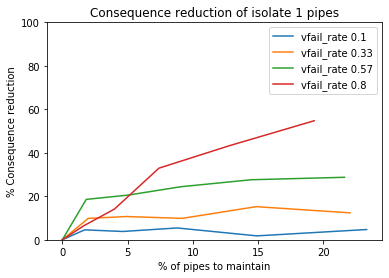

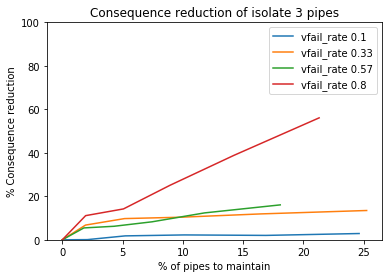

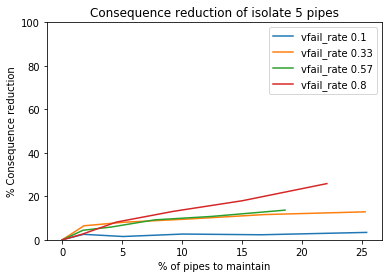

In [62]:
plot_maintain_effect(degree_ratios_sparse,degree_reductions_sparse,repair_degrees,fail_rates)

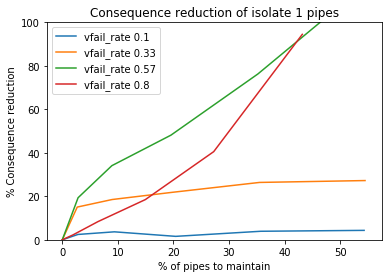

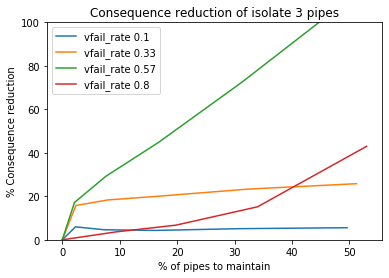

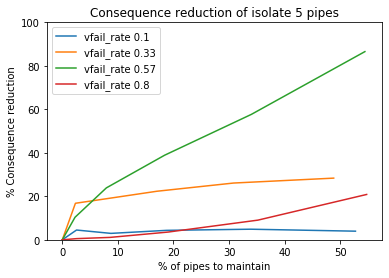

In [63]:
plot_maintain_effect(degree_ratios_med,degree_reductions_med,repair_degrees,fail_rates)

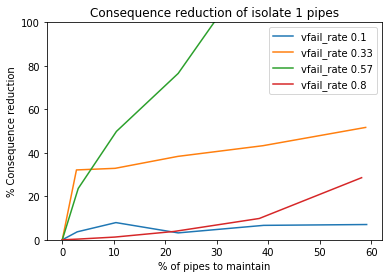

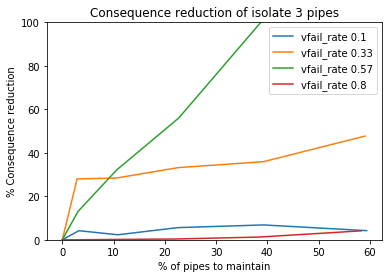

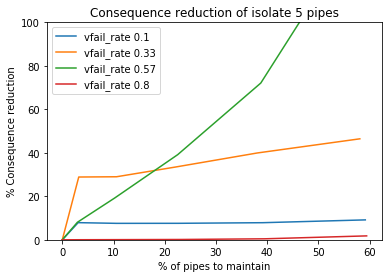

In [64]:
plot_maintain_effect(degree_ratios_dense,degree_reductions_dense,repair_degrees,fail_rates)

In [ ]:
fail_rate = 0.5
repair_degree = 5
maintain_degrees = list(range(10))

directs, unintends = [],[]
for maintain_degree in maintain_degrees:
    vids2maintain = maintain_valves(mesh,maintain_degree)
    print (f'num of valves to maintain {len(vids2maintain)}, ratio {len(vids2maintain)/len(mesh.valid_vids)}')
    
    direct,unintend = mc_repair_impact(mesh,fail_rate,mesh.valid_pids,
                                       maintain_degree,repair_degree,num_sim = 120)
    directs.append(direct)
    unintends.append(unintend)

In [ ]:
unintends

In [ ]:
vids2maintain = maintain_valves(mesh,3)
print (len(vids2maintain),len(vids2maintain)/len(mesh.valid_vids))

In [ ]:
directs

In [ ]:
unintends

In [ ]:
grid_size = 15
mesh_setting = generate_mesh_settings(grid_size, True)
mesh = create_mesh(mesh_setting)
sparseness = calculate_sparseness(mesh)
print (f'sparseness of the created mesh (compare to the grid network) {sparseness}')

In [ ]:
fail_rate = 0.5
repair_degree = 3
maintain_degrees = list(range(10))

directs, unintends = [],[]
for maintain_degree in maintain_degrees:
    vids2maintain = maintain_valves(mesh,maintain_degree)
    print (f'num of valves to maintain {len(vids2maintain)}, ratio {len(vids2maintain)/len(mesh.valid_vids)}')
    
    direct,unintend = mc_repair_impact(mesh,fail_rate,mesh.valid_pids,
                                       maintain_degree,repair_degree,num_sim = 120)
    directs.append(direct)
    unintends.append(unintend)

In [ ]:
directs

In [ ]:
unintends

In [ ]:
fail_rate = 0.5
repair_degree = 5
maintain_degrees = list(range(10))

directs, unintends = [],[]
for maintain_degree in maintain_degrees:
    vids2maintain = maintain_valves(mesh,maintain_degree)
    print (f'num of valves to maintain {len(vids2maintain)}, ratio {len(vids2maintain)/len(mesh.valid_vids)}')
    
    direct,unintend = mc_repair_impact(mesh,fail_rate,mesh.valid_pids,
                                       maintain_degree,repair_degree,num_sim = 120)
    directs.append(direct)
    unintends.append(unintend)

In [ ]:
unintends

In [ ]:
mc_results = []
sparsity = []
num_sim = 0
while num_sim < mc_num:
    try:
        mesh_setting = generate_mesh_settings(grid_size, True)
        mesh = create_mesh(mesh_setting)
        sparseness = calculate_sparseness(mesh)
        print (f'sparseness of the created mesh (compare to the grid network) {sparseness}')
    except:
        continue
    result = multi_degree_impact(mesh,fail_rate,degree_list)
    mc_results.append(result) 
    sparsity.append(sparseness)
    num_sim+=1

In [ ]:
direct_results = [[],[],[],[],[]]
unintend_results = [[],[],[],[],[]]
for result in mc_results:
    for i in range(len(degree_list)):
        direct_results[i].append(result[i][0])
        unintend_results[i].append(result[i][1])
        
    
    

In [ ]:
unintend_results

In [ ]:
def plot_mc_multi_consequence(sparsity,direct,unintend,degree):
    plt.scatter(sparsity, direct, label="direct")
    plt.scatter(sparsity, unintend, label="unintend")
    plt.title(f'Consequence of isolate {degree} pipes')
    plt.xlabel('meshness')
    plt.ylabel('Avg impact ratio')
    plt.legend()
    plt.show()

In [ ]:
for i in range(len(degree_list)):
    plot_mc_multi_consequence(sparsity,direct_results[i],unintend_results[i],degree_list[i])

In [ ]:
def get_sp_degree(sparsity,num_class = 10):
    interval = 1/num_class
    for i in range(num_class):
        if sparsity<interval*(i+1):
            return i

def create_consequence_df(sparsity,direct,unintend):
    conse_type = len(direct)*['direct']+len(unintend)*['unintend']
    sparsities = sparsity+sparsity
    sparsity_degree = [get_sp_degree(sp) for sp in sparsities]
    df_dict = {
        'sparsity':sparsities,
        'mesh_degree':sparsity_degree,
        'consequence':direct+unintend,
        'type':conse_type
    }
    return pd.DataFrame.from_dict(df_dict)

In [ ]:
df1 = create_consequence_df(sparsity,direct_results[i],unintend_results[i])

In [ ]:
# plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
for i,k in enumerate(degree_list):
    fig = plt.figure()
    df = create_consequence_df(sparsity,direct_results[i],unintend_results[i])
    ax = sns.boxplot(x="mesh_degree", y="consequence", hue="type",
                    data=df).set_title(f'{k} pipe isolation at vfail 0.25')

In [ ]:
for i,k in enumerate(degree_list):
    fig = plt.figure()
    df = create_consequence_df(sparsity,direct_results[i],unintend_results[i])
    df_direct = df[df['type'] == 'direct'].groupby('mesh_degree', as_index=False).median()
    df_unintend = df[df['type'] == 'unintend'].groupby('mesh_degree', as_index=False).median()
    
    plt.plot(df_direct['mesh_degree'], df_direct['consequence'], label="direct")
    plt.plot(df_unintend['mesh_degree'], df_unintend['consequence'], label="unintend")
    plt.plot(df_unintend['mesh_degree'], df_direct['consequence']+df_unintend['consequence'], 
             label="tot")
    plt.title(f'Consequence of isolate {k} pipes')
#     plt.bar(pids2sim, direct_ratio+unintend_ratio, label="tot")
    
    plt.xlabel('mesh-degree')
    plt.ylabel('Median impact ratio')
    plt.legend()
    plt.show()

#     ax = sns.pointplot(x='sparsity_degree', y='consequence',
#                        data=df_direct)
#     ax = sns.pointplot(x='sparsity_degree', y='consequence',
#                        data=df_unintend.groupby('sparsity_degree', as_index=False).median(),ax = ax)